# Задание на проверку центральной предельной теоремы


Я выбрал для этой работы распределение Эрланга (Гамма распределение) 
https://ru.wikipedia.org/wiki/Гамма-распределение

In [6]:
import scipy.stats as sts
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Генерируем выборку на 1000 элементов

In [37]:
k=5.0
tetta=1.0
erlang_rv=sts.erlang(k,loc=0.,scale=tetta)
erlangeSample=erlang_rv.rvs(1000)

## Построение гистограммы и графика теоретической плотности случайной величины

Text(0,0.5,u'pdf')

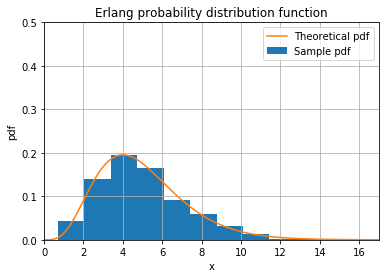

In [39]:
%matplotlib inline
plt.hist(erlangeSample, normed=True,label='Sample pdf')

x=np.linspace(0,20,1000)
pdf=erlang_rv.pdf(x)
plt.plot(x,pdf,label='Theoretical pdf')
plt.legend()
plt.grid()
plt.axis([0,17,0,0.5])
plt.title('Erlang probability distribution function')
plt.xlabel('x')
plt.ylabel('pdf')

## Генерация выборок объема n(5,10,50) + построение гистограмм их выборочных средних

In [41]:
#пустой массив под выборочное среднее значение
distributionSample=np.zeros((3,1000))

#массив объема выборок
arrayVolume=[5,10,50]

for i in xrange(3):
    for j in xrange(1000):
        distributionSampleTemp=np.array(sts.erlang.rvs(k,loc=0,scale=xm,size=arrayVolume[i]))
        distributionSampleTempMean=distributionSampleTemp.mean()
        distributionSample[i,j]=distributionSampleTempMean


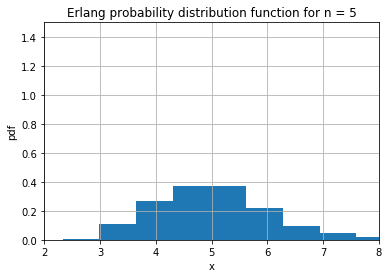

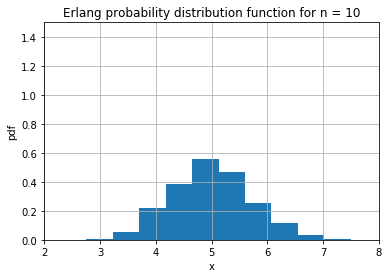

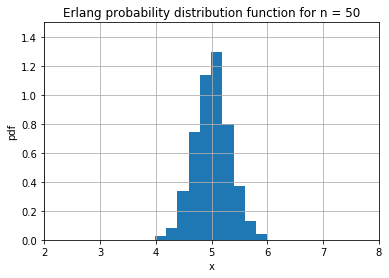

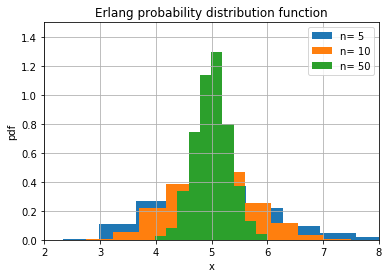

In [52]:
#строим гистограммы
for i in xrange(3):
    plt.hist(distributionSample[i],normed=True)
    plt.grid()
    plt.axis([2,8,0,1.5])
    plt.title('Erlang probability distribution function for n = '+str(arrayVolume[i]))
    plt.xlabel('x')
    plt.ylabel('pdf')
    plt.show()
    
for i in xrange(3):
    plt.hist(distributionSample[i],normed=True,label='n= '+str(arrayVolume[i]))
    plt.grid()
    plt.axis([2,8,0,1.5])
    plt.title('Erlang probability distribution function')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('pdf')

## Вычисление параметров нормальных распределений


In [59]:
distributionSampleMean=k*tetta
distributionSampleVariance=np.zeros(3)
for i in xrange(3):
    distributionSampleVariance[i]=k*(tetta**2)/arrayVolume[i]

## Рисуем  плотность соответствующего нормального распределения поверх гистограмм

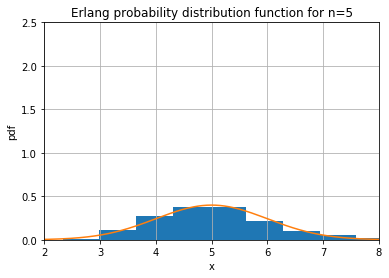

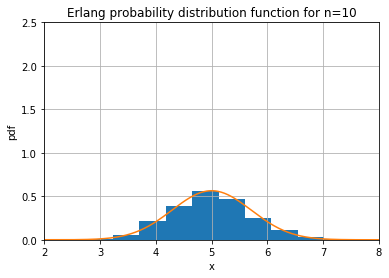

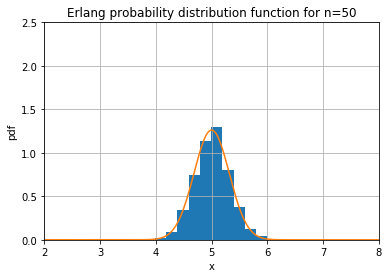

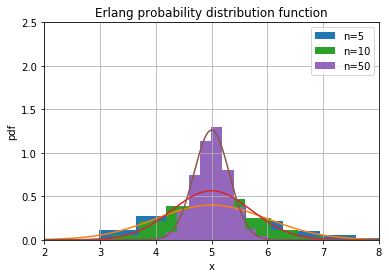

In [63]:
from math import sqrt
#гистограммы выборки
for i in xrange(3):
    plt.hist(distributionSample[i],normed=True)
    plt.grid()
    plt.axis([2,8,0,2.5])
    plt.title('Erlang probability distribution function for n='+str(arrayVolume[i]))
    plt.xlabel('x')
    plt.ylabel('pdf')

    #зададим нормально распределенную случайную величину
    stdDeviation=sqrt(distributionSampleVariance[i])
    norm_rv=sts.norm(loc=distributionSampleMean,scale=stdDeviation)
    x=np.linspace(-10,10,1000)
    pdf=norm_rv.pdf(x)
    plt.plot(x,pdf)
    plt.show()

for i in xrange(3):
    plt.hist(distributionSample[i],normed=True,label='n='+str(arrayVolume[i]))
    plt.grid()
    plt.axis([2,8,0,2.5])
    plt.title('Erlang probability distribution function')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('pdf')
    
    #-//-
    stdDeviation=sqrt(distributionSampleVariance[i])
    norm_rv=sts.norm(loc=distributionSampleMean,scale=stdDeviation)
    x=np.linspace(-10,10,1000)
    pdf=norm_rv.pdf(x)
    plt.plot(x,pdf)

# Выводы:
### Распределение выборочных средних хорошо описывается нормальным распределением, о чем и говорит в центральной предельной теореме
### Увеличивая n, увеличивается точность нормальной аппроксимации